In [1]:
%matplotlib widget
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import utils

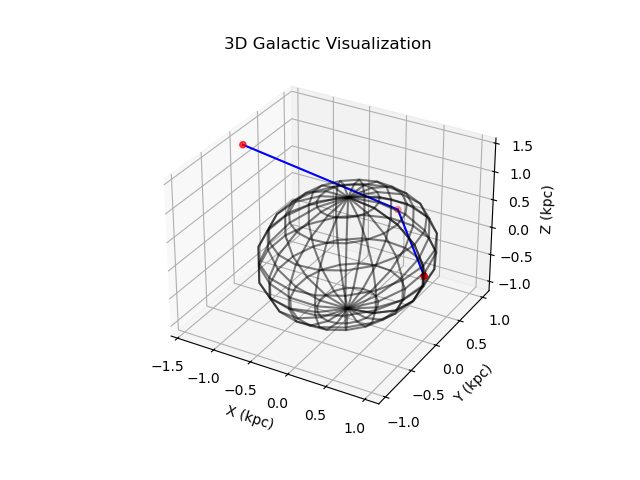

In [2]:

# Example galactic coordinates (longitude, latitude, radius)
coordinates = [
    (0, 0, 1),   # Center of the galaxy
    (90, 0, 1),  # 90 degrees longitude
    (180, 45, 2) # Some point in space
]

# Convert to Cartesian coordinates for plotting
points = np.array([utils.galactic_to_cartesian(*coord) for coord in coordinates])

# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], color='r')

# Draw lines between points
for i in range(len(points)-1):
    ax.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], [points[i][2], points[i+1][2]], color='blue')

# Add spherical shell at radius 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=0.5)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Galactic Visualization')

plt.show()


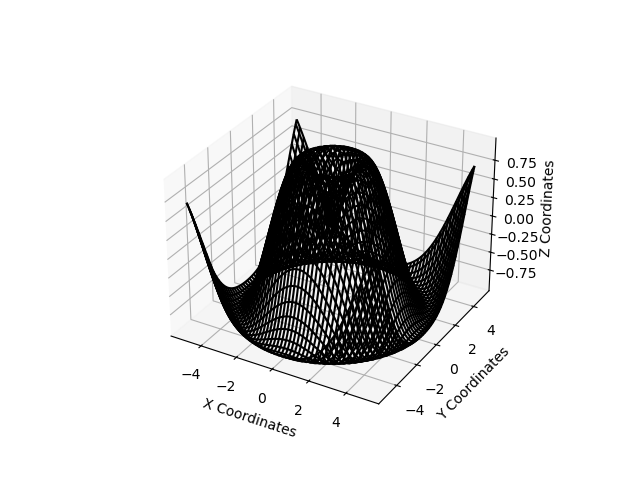

In [3]:

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Example data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot a wireframe
ax.plot_wireframe(X, Y, Z, color='k')

ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')

plt.show()

0.6666666666666667 0.6666666666666666 0.3333333333333333
0.8198400939341273 0.5477996372765352 0.16666666666666666
0.7071067811865476 0.7071067811865475 0.0
0.4811379353814157 0.7200738067288024 0.5
0.6666666666666667 0.6666666666666666 0.3333333333333333
0.5477996372765354 0.8198400939341273 0.16666666666666666
0.7200738067288024 0.48113793538141564 0.5
0.871041976584251 0.36079740009746464 0.3333333333333333
0.8198400939341273 0.5477996372765352 0.16666666666666666
0.5270462766947299 0.5270462766947298 0.6666666666666666
0.7200738067288024 0.48113793538141564 0.5
0.6666666666666667 0.6666666666666666 0.3333333333333333
0.2852353895437613 0.6886191459053214 0.6666666666666666
0.4811379353814157 0.7200738067288024 0.5
0.3607974000974647 0.871041976584251 0.3333333333333333
3.5696077818122776e-17 0.582961190818051 0.8125
0.2852353895437613 0.6886191459053214 0.6666666666666666
0.16895317489845368 0.8493849684870415 0.5
0.29148059540902554 0.5048592006688598 0.8125
0.5270462766947299 0.5

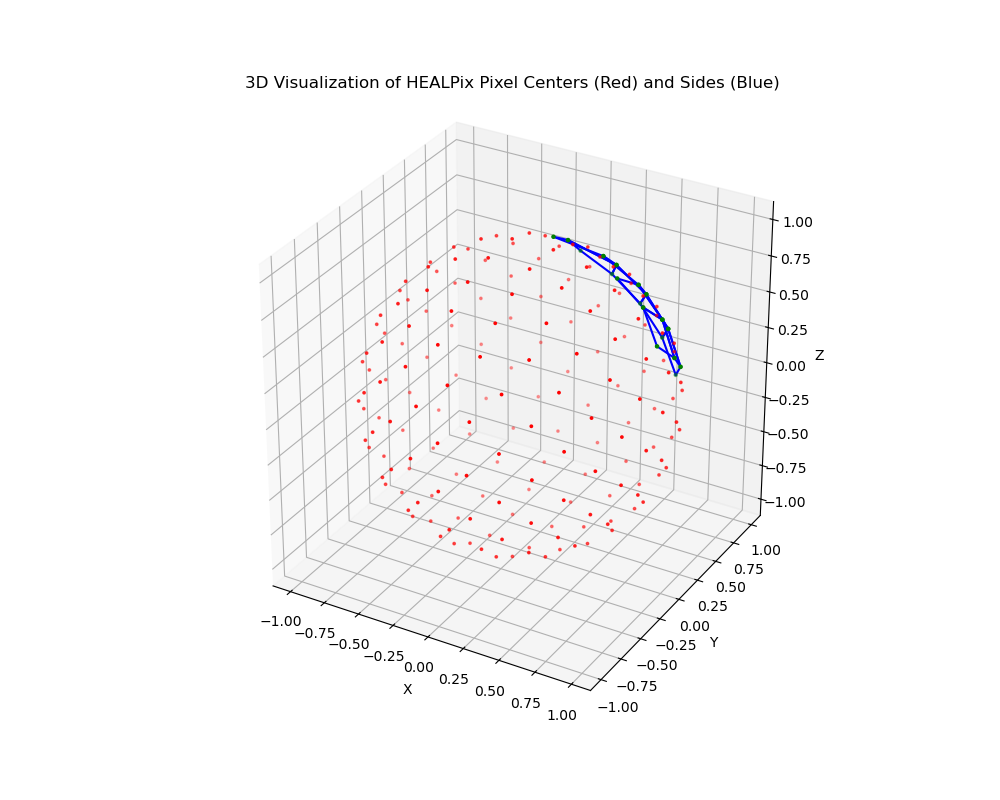

In [8]:

# Set the HEALPix resolution
nside = 4  # A manageable nside value for clear visualization
npix = hp.nside2npix(nside)

# Get the coordinates of the centers of the HEALPix pixels
l_c, b_c = hp.pix2ang(nside, np.arange(npix), lonlat=True)

# Convert Galactic coordinates to Cartesian coordinates for 3D plotting
x_c, y_c, z_c = utils.galactic_to_cartesian( l_c,b_c, 1)

# Prepare a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over all pixels to plot their boundaries
#for pix in range(npix):
for pix in range(10):

    # Get the boundaries of the pixel (returns vertices in x, y, z cartesian coordinates)
    # We are now extracting the full shape which is (3, N)
    vertices = hp.boundaries(nside, pix, step=1, nest=True)  # Using NESTED ordering by default
    x = vertices[0]
    y = vertices[1]
    z = vertices[2]
    ax.scatter(x, y, z, c='g', s=5) # Plot the vertices of the pixel with a given point size
    ### Plot the edges of the pixel
    for i in range(3):
        print(x[i], y[i], z[i])
        ax.plot([x[i], x[i+1]], [y[i], y[i+1]], [z[i], z[i+1]], c='b')  # Draw a line between each pair of vertices
    ax.plot([x[-1], x[0]], [y[-1], y[0]], [z[-1], z[0]], c='b')  # Draw a line between each pair of vertices


# Scatter plot for point visualization
ax.scatter(x_c, y_c, z_c, c='r', s=3)  # Color red, point size 1

# # Set the aspect of the plot to be equal
ax.set_box_aspect([1,1,1])

# Enhance the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of HEALPix Pixel Centers (Red) and Sides (Blue)')
ax.grid(True)

plt.show()



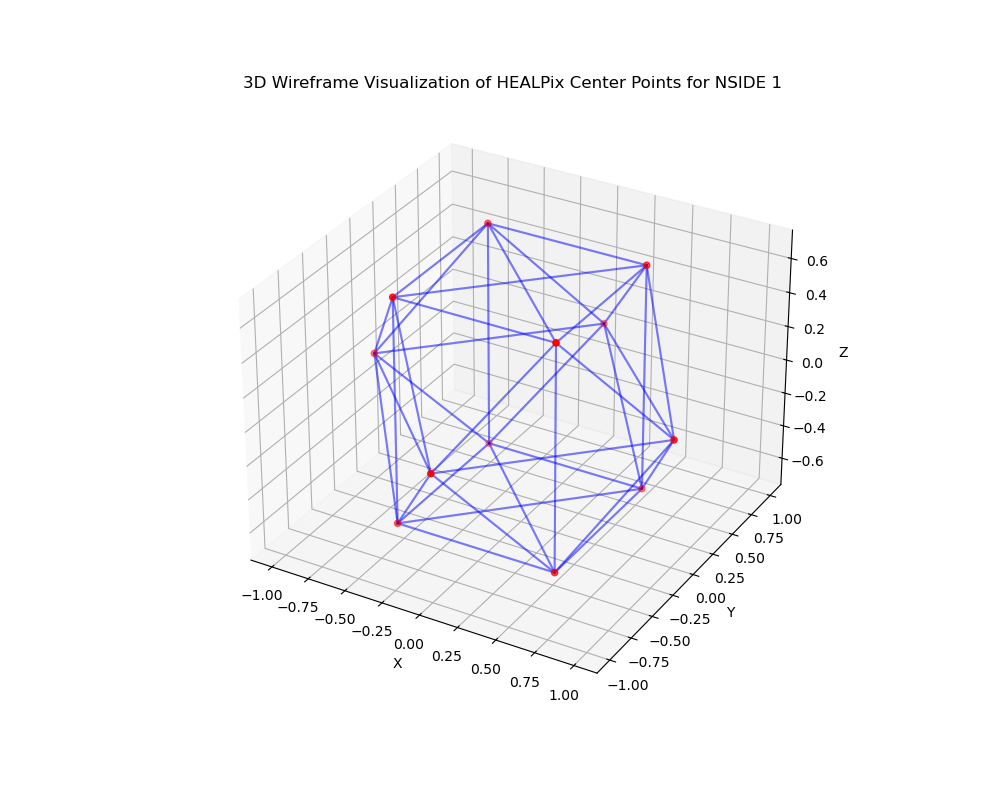

In [10]:

# Set the HEALPix resolution
nside = 1  # Lower nside for clarity in visual connections
npix = hp.nside2npix(nside)

# Get the coordinates of the HEALPix pixels
l, b = hp.pix2ang(nside, np.arange(npix), lonlat=True)

# Convert Galactic coordinates to Cartesian coordinates for 3D plotting
x, y, z = utils.galactic_to_cartesian( l,b, 1)


# Prepare a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each pixel's neighbors
for pix in range(npix):

    neighbors = hp.get_all_neighbours(nside, pix)
    x_cent, y_cent, z_cent = x[pix], y[pix], z[pix]
    
    for neigh in neighbors:
        if neigh < 0:  # Skip non-existing neighbors (might happen at the borders)
            continue
        # Connect current point to its neighbor
        ax.plot([x_cent, x[neigh]], [y_cent, y[neigh]], [z_cent, z[neigh]], 'blue', alpha= 0.3)  # Color blue

# Scatter plot for point visualization (optional, for clarity)
ax.scatter(x, y, z, color='red', s=20)  # Color red, larger point size for visibility

# Set the aspect of the plot to be equal
# ax.set_box_aspect([1,1,1])
# Enhance the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Wireframe Visualization of HEALPix Center Points for NSIDE '+str(nside))
ax.grid(True)

plt.show()